# RomExchange API Sandbox

Hello, 

RomExchange API Sandbox is currently a notebook where I can tinker with the Ro mobile Exchange API (see API Docs below).
By tinker I mean:
1. Making requests and obtaining data. 
2. Using Data in time series analysis.
3. Implementing time series models e.g. SarimaX

The data coveted is the historical market value of items in the game.

API Docs : https://jessicayeh.github.io/rom-exchange-openapi/#section/Recent-Changes

# Contents

1. **Importing Libraries**  
2. **Making requests**  
3. **Making a Dataframe**  
4. **Cleaning Data**  
5. **Exploratory Data analysis**  
5. **Time series modeling**  

## 1. Importing Libraries

In [1]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
from time import sleep

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()


## 2. Making Requests

In [33]:
# Define URL and Headers for the get below:
# Pet material data:
url = 'https://www.romexchange.com/api?type=13&sort=change&sort_dir=desc&sort_server=global&range=all&page=1' 
headers = {'User-Agent': 'XY', 'Content-type': 'application/json'}

# To make a request over more periods of time will need to use the page query and set the page=2,3,4,5 etc. 
# Perhaps Automate this? Windows Task Scheduler?

In [34]:
# Make request for the data
r = requests.get(url, headers = headers)

In [35]:
r.status_code

200

In [36]:
# Obtain content of request payload
print(r.text)

[{"name":"Monster's Proof","type":13,"image":null,"global_sea_diff":-31.3,"global":{"all":{"data":[{"snap":true,"price":25000,"time":"2019-09-26T17:35:55Z"},{"snap":true,"price":94954,"time":"2019-09-30T08:46:46Z"},{"snap":false,"price":163845,"time":"2019-10-02T07:37:37Z"},{"snap":false,"price":150334,"time":"2019-10-04T07:51:31Z"},{"snap":false,"price":128320,"time":"2019-10-06T07:44:42Z"},{"snap":false,"price":104677,"time":"2019-10-08T08:16:54Z"},{"snap":false,"price":103055,"time":"2019-10-10T08:17:20Z"},{"snap":false,"price":100822,"time":"2019-10-12T08:22:39Z"},{"snap":false,"price":113308,"time":"2019-10-14T07:31:29Z"},{"snap":false,"price":107321,"time":"2019-10-16T08:10:05Z"},{"snap":false,"price":86126,"time":"2019-10-18T07:28:45Z"},{"snap":false,"price":84621,"time":"2019-10-20T07:47:49Z"},{"snap":false,"price":85909,"time":"2019-10-22T07:48:06Z"},{"snap":false,"price":64963,"time":"2019-10-25T07:40:16Z"},{"snap":false,"price":64942,"time":"2019-10-27T07:43:03Z"},{"snap":fa

## 3. Creating a Dataframe

In [37]:
# Jsonify the data payload
j = r.json()
type(j)

list

In [38]:
# Reference for Dataframe indexing below
j[0]

{'name': "Monster's Proof",
 'type': 13,
 'image': None,
 'global_sea_diff': -31.3,
 'global': {'all': {'data': [{'snap': True,
     'price': 25000,
     'time': '2019-09-26T17:35:55Z'},
    {'snap': True, 'price': 94954, 'time': '2019-09-30T08:46:46Z'},
    {'snap': False, 'price': 163845, 'time': '2019-10-02T07:37:37Z'},
    {'snap': False, 'price': 150334, 'time': '2019-10-04T07:51:31Z'},
    {'snap': False, 'price': 128320, 'time': '2019-10-06T07:44:42Z'},
    {'snap': False, 'price': 104677, 'time': '2019-10-08T08:16:54Z'},
    {'snap': False, 'price': 103055, 'time': '2019-10-10T08:17:20Z'},
    {'snap': False, 'price': 100822, 'time': '2019-10-12T08:22:39Z'},
    {'snap': False, 'price': 113308, 'time': '2019-10-14T07:31:29Z'},
    {'snap': False, 'price': 107321, 'time': '2019-10-16T08:10:05Z'},
    {'snap': False, 'price': 86126, 'time': '2019-10-18T07:28:45Z'},
    {'snap': False, 'price': 84621, 'time': '2019-10-20T07:47:49Z'},
    {'snap': False, 'price': 85909, 'time': '20

In [48]:
# make a dataframe out of just the 'data', price' dict headers and add the name of the item
j[0]['name']

dfglobal = pd.DataFrame(j[0]['global']['all']['data'])
dfglobal['name'] = j[0]['name']
dfglobal['server'] = 'Global'

dfsea = pd.DataFrame(j[0]['sea']['all']['data'])
dfsea['name'] = j[0]['name']
dfsea['server'] = 'Sea'

dfsea

df1 = dfglobal.append(dfsea)


## 4. Cleaning Data

## 5. Exploratory Data Analysis

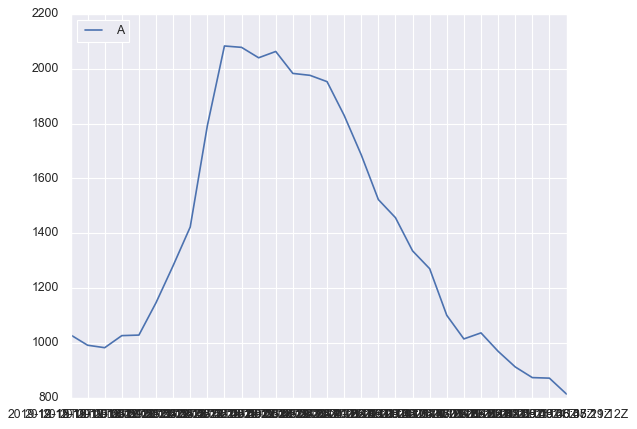

In [62]:
#plt.hist(dfglobal['price'], normed=True, alpha=0.5)

# Plot the data with Matplotlib defaults
plt.plot(dfglobal.time, dfglobal.price)
plt.legend('ABCDE', ncol=2, loc='upper left');

## 6. Time series modeling

In [21]:
# This is the Arima alternative reddit post
# https://www.reddit.com/r/datascience/comments/gro5w8/alternative_approaches_to_arima_for_time_series/